In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average
  
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        middle = [data[len(data)//2 - 1], data[len(data)//2]]
        mid_avg = mean(middle)
        return mid_avg
    else:
        middle = data[len(data)//2]
        return middle

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de
  
def elem_stats(data, rounder=False):
    if rounder== True:
        data_stats = {"mean": round(mean(data), 2), 'median': round(median(data), 2), 'variance': round(variance(data),2), 'standard_deviance': round(stand_dev(data),2), "min": round(min(data),2), 'max': round(max(data),2)}
    else:
        data_stats = {"mean": mean(data), 'median':median(data), 'variance':variance(data), 'standard_deviance': stand_dev(data), "min": min(data), 'max': max(data)}
    return data_stats

def cluster_guess():
    amount = int(input("How many: "))
    xes = []
    yes = []
    for n in range(0,amount):
        xes.append(float(input("X cord: ")))
        yes.append(float(input("Y cord: ")))
    return xes, yes

def classify(xs, ys, centroidx, centroidy, start, end):
    group_coords = {}
    indicies = {}
    classe = [] #distance tracker 
    for num in range(0, len(centroidx)):
        group_coords[num] = [[],[]] # establishes dictionary
        indicies[num] = []
    for n in range(start, end): # for each coord
        
        for c in range(0, len(centroidx)): # for each centroid
            classe.append((xs[n] - centroidx[c])**2 + (ys[n] - centroidy[c])**2) # put the distance for each point to centroid in classe
            
        i = classe.index(min(classe)) #i is the index of the least distance
        group_coords[i][0].append(xs[n])
        group_coords[i][1].append(ys[n])
        indicies[i].append(n)
        classe.clear()
    
    return group_coords, indicies

def centroid_new(xes, yes):
    x_av =  mean(xes)
    y_av =  mean(yes)
    return x_av, y_av

def cent(orig_x, orig_y, orig_cenx, orig_centy, s, e):
    coords, indics = classify(orig_x, orig_y, orig_cenx, orig_centy, s, e) #first clusters
    for i in range(0,4): #just counter thing
        xcen = [] #these are new centroids
        ycen = []
        for n in range(0, len(orig_cenx)):
            one, two = centroid_new(coords[n][0], coords[n][1])
            xcen.append(one)
            ycen.append(two)
            
        coords, indics =  classify(orig_x, orig_y, xcen, ycen, s, e)
    return coords, indics, xcen, ycen

def plot_clust(coord_dict, centxs,centys):
    for g in range(0, len(coord_dict)):
            plt.scatter(coord_dict[g][0], coord_dict[g][1])
    for n in range(0, len(centxs)):
        plt.text(centxs[n], centys[n], f"{n}")
        
def correlation_array(array1, array2):
    x_sum = np.sum(array1)
    y_sum = np.sum(array2)
    e1 = np.sum(np.multiply(array1, array2))
    x_sq = np.sum(np.power(array1, 2))
    y_sq = np.sum(np.power(array2,2))
    
    e1 = e1*len(array1)

    x_sq_sub = (x_sq *len(array1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(array2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr

In [3]:
cus_path = "/kaggle/input/customer/customer_data.csv"
customer = pd.read_csv(cus_path)
customer.sort_values('Gender', inplace=True)
customer.reset_index(inplace=True)
customer

,index,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,69,70,Female,32,48,47
1,96,97,Female,47,60,47
2,160,161,Female,56,79,35
3,94,95,Female,32,60,42
4,93,94,Female,40,60,40
...,...,...,...,...,...,...
195,81,82,Male,38,54,55
196,80,81,Male,57,54,51
197,77,78,Male,40,54,48
198,138,139,Male,19,74,10


112
200


Text(0, 0.5, 'women score')

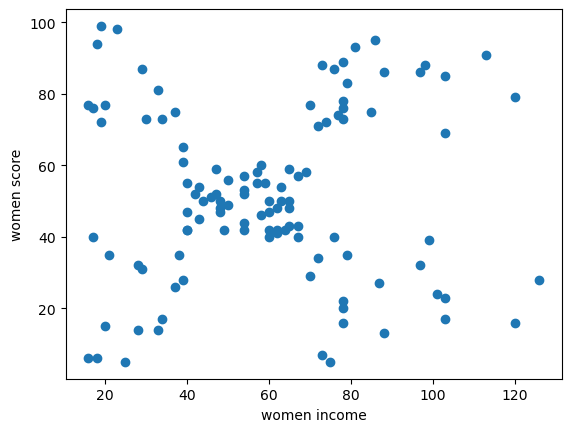

In [4]:
counter = 0
for item in customer["Gender"]:
    if item == "Female":
        counter+=1
print(counter)

fem_mon = customer['Annual Income (k$)'][0:counter]
fem_score = customer['Spending Score (1-100)'][0:counter]

print(len(customer["index"]))
male_mon = customer['Annual Income (k$)'][counter+1:len(customer["index"])-1]
male_score = customer['Spending Score (1-100)'][counter+1:len(customer["index"])-1]

plt.scatter(fem_mon, fem_score)
plt.xlabel('women income')
plt.ylabel('women score')

Text(0, 0.5, 'male score')

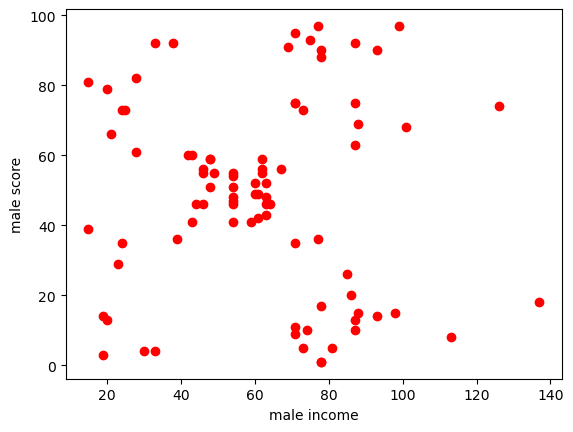

In [5]:
plt.scatter(male_mon, male_score, c="red")
plt.xlabel('male income')
plt.ylabel('male score')

1). Use the K-Means algorithm to cluster the data using the variables income and
spending score independently for women and men.

In [6]:
# fem_x, fem_y = cluster_guess() #Hastaged out because input stuff makes errors on github
fem_x = [25, 25, 55, 90, 90]
fem_y = [20, 85, 55, 25, 85]
print(fem_x, fem_y)
#5, 25 20 25 85 55 55 90 25 90 85

[25, 25, 55, 90, 90] [20, 85, 55, 25, 85]


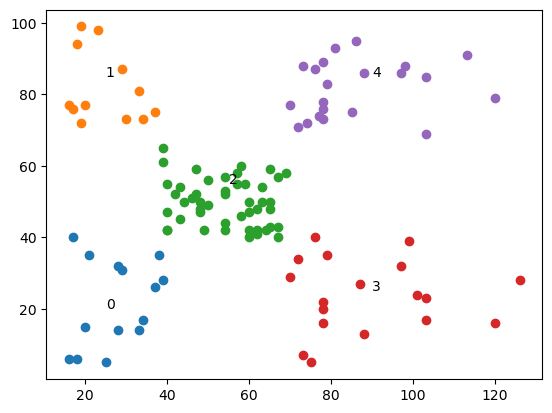

In [7]:
fem_cords, fem_inds= classify(fem_mon, fem_score, fem_x, fem_y, 0, counter)
for g in range(0, len(fem_cords)):
               plt.scatter(fem_cords[g][0], fem_cords[g][1])
for n in range(0, len(fem_x)):
    plt.text(fem_x[n], fem_y[n], f"{n}")

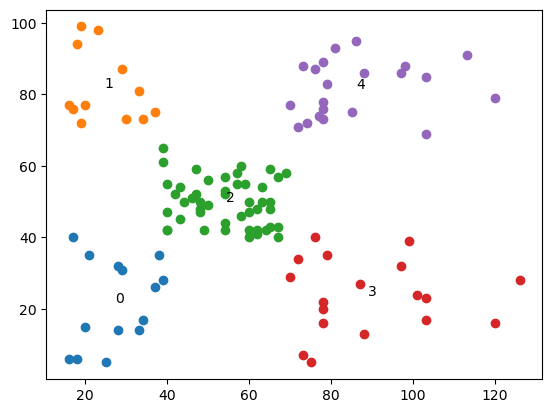

In [8]:
wom_cords, wom_inds, womx, womy = cent(fem_mon, fem_score, fem_x, fem_y,0, counter)
plot_clust(wom_cords, womx, womy)

In [9]:
# male_x, male_y = cluster_guess() #again, makes errors when uploaded to github
male_x = [25, 25, 55, 85, 85]
male_y = [20, 75, 55, 15, 80]
print(male_x, male_y)
#5, 25 20 25 75 55 55 85 15 85 80

[25, 25, 55, 85, 85] [20, 75, 55, 15, 80]


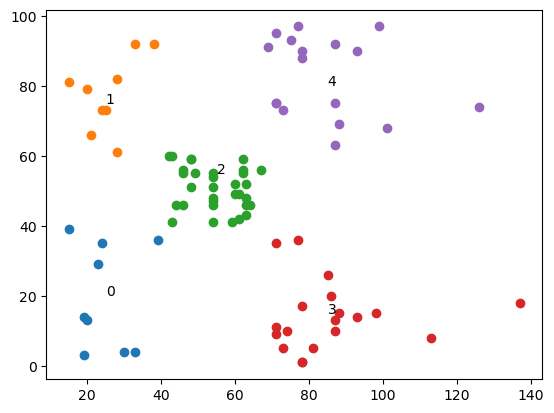

In [10]:
male_cords, male_inds= classify(male_mon, male_score, male_x, male_y, counter+1, len(customer["index"])-1)
for g in range(0, len(male_cords)):
               plt.scatter(male_cords[g][0], male_cords[g][1])
for n in range(0, len(male_x)):
    plt.text(male_x[n], male_y[n], f"{n}")

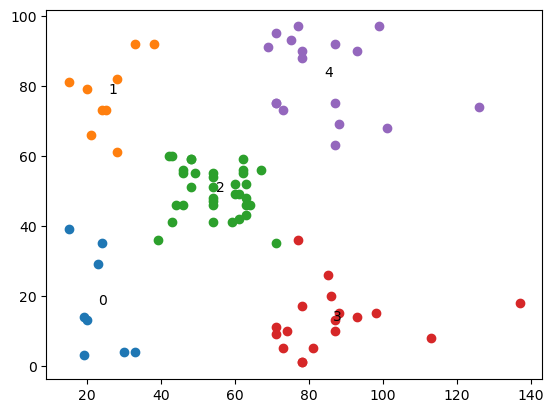

In [11]:
men_cords, men_inds, menx, meny = cent(male_mon, male_score, male_x, male_y,counter+1, len(customer["index"])-1)
plot_clust(men_cords, menx, meny)

* a). Provide explanations of the shopper for each cluster.
* b). Compute the statistics for each cluster for both the women and men.
* Are there any significant differences ? If so, what are they ?

In [12]:
wom_stats = {}

mon_data1 = {}
score_data1 = {}
for i in range(0, len(wom_inds)):
    mon_data1[i] = []
    score_data1[i] = []
    
    for item in wom_inds[i]:
        mon_data1[i].append(fem_mon[item])
        score_data1[i].append(fem_score[item])
        
    wom_stats[i] = [[elem_stats(mon_data1[i])], [elem_stats(score_data1[i])]]

print(wom_stats)

{0: [[{'mean': 27.357142857142858, 'median': 28.0, 'variance': 60.372448979591844, 'standard_deviance': 7.769970976753507, 'min': 16, 'max': 39}], [{'mean': 21.714285714285715, 'median': 21.5, 'variance': 135.48979591836732, 'standard_deviance': 11.640008415734385, 'min': 5, 'max': 40}]], 1: [[{'mean': 24.583333333333332, 'median': 21.5, 'variance': 51.90972222222222, 'standard_deviance': 7.204840194079409, 'min': 16, 'max': 37}], [{'mean': 81.83333333333333, 'median': 77.0, 'variance': 92.6388888888889, 'standard_deviance': 9.624909811987274, 'min': 72, 'max': 99}]], 2: [[{'mean': 54.212765957446805, 'median': 54, 'variance': 83.69941149841554, 'standard_deviance': 9.148738246250984, 'min': 39, 'max': 69}], [{'mean': 49.851063829787236, 'median': 50, 'variance': 41.318243549117255, 'standard_deviance': 6.427926846901515, 'min': 40, 'max': 65}]], 3: [[{'mean': 89.05555555555556, 'median': 83.0, 'variance': 264.9413580246914, 'standard_deviance': 16.27701932248934, 'min': 70, 'max': 126

In [13]:
man_stats = {}

mon_data2 = {}
score_data2 = {}
for i in range(0, len(male_inds)):
    mon_data2[i] = []
    score_data2[i] = []
    
    for item in male_inds[i]:
        mon_data2[i].append(male_mon[item])
        score_data2[i].append(male_score[item])
        
    man_stats[i] = [[elem_stats(mon_data2[i])], [elem_stats(score_data2[i])]]

print(man_stats)

{0: [[{'mean': 24.666666666666668, 'median': 23, 'variance': 54.0, 'standard_deviance': 7.3484692283495345, 'min': 15, 'max': 39}], [{'mean': 19.666666666666668, 'median': 14, 'variance': 200.88888888888889, 'standard_deviance': 14.173527750312866, 'min': 3, 'max': 39}]], 1: [[{'mean': 25.77777777777778, 'median': 25, 'variance': 43.061728395061735, 'standard_deviance': 6.562143582325956, 'min': 15, 'max': 38}], [{'mean': 77.66666666666667, 'median': 79, 'variance': 100.0, 'standard_deviance': 10.0, 'min': 61, 'max': 92}]], 2: [[{'mean': 54.71875, 'median': 54.0, 'variance': 55.4521484375, 'standard_deviance': 7.446619933735037, 'min': 42, 'max': 67}], [{'mean': 50.75, 'median': 51.0, 'variance': 34.8125, 'standard_deviance': 5.900211860602973, 'min': 41, 'max': 60}]], 3: [[{'mean': 85.57894736842105, 'median': 81, 'variance': 253.29639889196676, 'standard_deviance': 15.915288212657877, 'min': 71, 'max': 137}], [{'mean': 14.157894736842104, 'median': 13, 'variance': 91.2908587257618, '

How strongly correlated is income and age with gender ?

In [14]:
corre1 = correlation_array(fem_mon, customer['Age'][0:len(fem_mon)])
corre2 = correlation_array(male_mon, customer['Age'][len(fem_mon)+1:])
print(corre1, corre2)

0.05991212789455605 -0.12280315572691498


How strongly correlated is age and spending score with gender ?

In [15]:
corre3 = correlation_array(fem_score, customer['Age'][0:len(fem_mon)])
corre4 = correlation_array(male_score, customer['Age'][len(fem_mon)+1:])
print(corre3, corre4)

-0.37543858377804734 -0.32973933904097624
